# Assignment 06 vt9438

In this notebook, I perform GMM clustering on the iris dataset, generate some datapoints, and perform k means clustering on them.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", color_codes=True)

%matplotlib inline

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']
iris = pd.read_csv(url, names=names)

Let us see how to process the data. We must make the target machine readable and scale the other values.

In [ ]:
iris.head()

,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
# turning this feature machine readable 
spec = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
data = [iris]

for dataset in data:
    dataset['species'] = dataset['species'].map(spec)

In [ ]:
iris.species.unique()

array([0, 1, 2])

In [ ]:
X = iris
X.drop(labels = 'species', axis=1)

,sepal-length,sepal-width,petal-length,petal-width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
y = iris.species
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

In [ ]:
# Scale the data to be between -1 and 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

Let us split the data into train and test.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Applying GMM to the data:



In [ ]:
from sklearn.mixture import GaussianMixture

gmmModel = GaussianMixture(n_components=3, # this is the number of clusters
                         covariance_type='full', 
                         max_iter=100,
                         n_init=1,
                         init_params='kmeans',
                         verbose=0,
                         random_state=1
                        )

gmmClusters = gmmModel.fit(X_train)
gmmLables = gmmModel.predict(X_test)

In [ ]:
gmmLables

array([1, 2, 2, 1, 0, 2, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 2, 2, 1, 1, 2, 2,
       2, 1, 0, 2, 1, 1, 2, 0])

Let us compute the value of np.sum(y_pred==y) / len(y_pred)

In [ ]:
y_pred = gmmLables

In [ ]:
np.sum(y_pred) / len(y_pred)

1.2333333333333334

In this part of the notebook let us create a new dataset and work on it with k-means.

In [ ]:
from sklearn.datasets import make_blobs
X_blob, y_blob = make_blobs(n_samples=2000,
           centers = np.array(
               [[ 0.2,  2.3],
                [-1.5 ,  2.3],
                [-2.8,  1.8],
                [-2.8,  2.8],
                [-2.8,  1.3]]),
          cluster_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1]))

Let us plot the blobs generated:

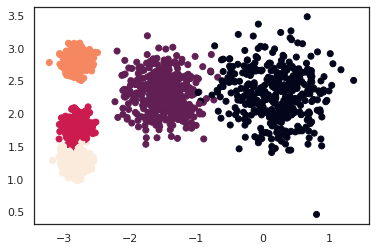

In [ ]:
a = plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob)

Let us train k-means on this dataset:

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=1)
km.fit(X_blob)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

We will use X_new to test and predict with our km model:

In [ ]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])

In [ ]:
y_cluster_kmeans = km.predict(X_new)
y_cluster_kmeans

array([1, 1, 2, 2], dtype=int32)

Let us plot the decision boundaries:

In [ ]:
centers = km.cluster_centers_

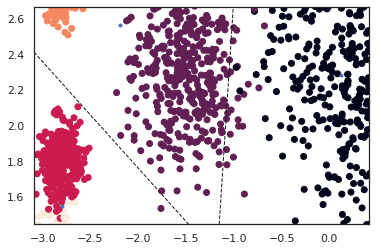

In [ ]:
from scipy.spatial import Voronoi, voronoi_plot_2d

voronoi = Voronoi(centers)
voronoi_plot_2d(voronoi)
plt.scatter(X_blob[:,0], X_blob[:,1], c = y_blob)

Let us see the value of inertia for k = 3:

In [ ]:
km = KMeans(n_clusters=3)
km.fit_predict(X_blob)
km.inertia_

644.6732592044764

Let us see the value of inertia at k = 8:

In [ ]:
km = KMeans(n_clusters=8)
km.fit_predict(X_blob)
km.inertia_

118.31463197397618

This implies that the inertia decreases as the number of clusters increases. As inertia is a measure of the spread of data, we would want it to be small. With respect to this model, we will choose k = 3 as the inertia isn't too large and k is pretty small.

Let us plot the relationship between k and inertia for falues between 3 and 8.

In [ ]:
def plotKvsInertia(X_data, column_indices, n_clusters=8, max_iter=300, tol=1e-04, init='k-means++', n_init=10, algorithm='auto'):
    import matplotlib.pyplot as plt
    inertia_values = []
    for i in range(1, n_clusters+1):
        km = KMeans(n_clusters=i, max_iter=max_iter, tol=tol, init=init, n_init=n_init, random_state=1, algorithm=algorithm)
        km.fit_predict(X_data)
        inertia_values.append(km.inertia_)
    fig, ax = plt.subplots(figsize=(8, 6))
    plt.plot(range(1, n_clusters+1), inertia_values)
    plt.xlabel('No. of Clusters', fontsize=15)
    plt.ylabel('Inertia', fontsize=15)
    plt.grid()
    plt.show()

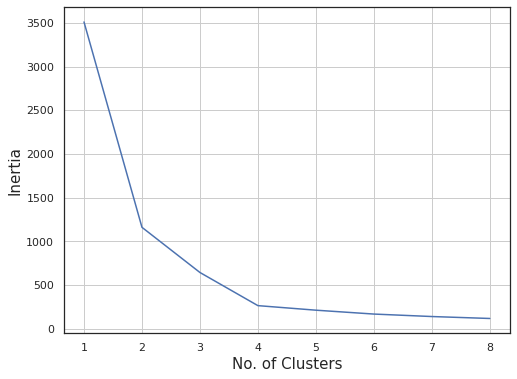

In [ ]:
plotKvsInertia(X_blob, [0, 1])

Here the value of k at the elbow is 3. We determine the elbow by finding the point after which the the curve decreases linearly.